In [1]:
from model.RAFS import RAFS

model = RAFS(faiss_index='/home/kdh/code/BME_Capstone1/BME_faiss.index',
             faiss_json='/home/kdh/code/BME_Capstone1/faiss_idx.json')

Using cache found in /home/kdh/.cache/torch/hub/facebookresearch_dinov2_main
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [6]:
import nibabel as nib
target_mri = nib.load('/home/kdh/code/BME_Capstone1/NFBS_Dataset/A00056556/sub-A00056556_ses-NFB3_T1w.nii.gz').get_fdata()
target_mri = target_mri[:, 150, :]
target_msk = nib.load('/home/kdh/code/BME_Capstone1/NFBS_Dataset/A00056556/sub-A00056556_ses-NFB3_T1w_brainmask.nii.gz').get_fdata()
target_msk = target_msk[:, 150, :]

In [7]:
import torchvision.transforms.functional as TF
tmp = TF.to_tensor(target_mri).float().cuda()#.shape

In [8]:
mask = model(tmp)

(-0.5, 255.5, 255.5, -0.5)

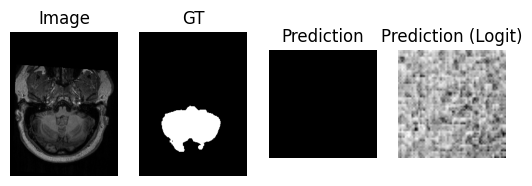

In [13]:
import matplotlib.pyplot as plt
plt.subplot(1, 4, 1)
plt.imshow(target_mri, cmap='gray')
plt.title('Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(target_msk, cmap='gray')
plt.title('GT')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mask.detach().cpu().numpy()[0, 0]>0.0, cmap='gray')
plt.title('Prediction')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(mask.detach().cpu().numpy()[0, 0], cmap='gray')
plt.title('Prediction (Logit)')
plt.axis('off')

In [20]:
def visualize_retrieval(retrieval):
    image = retrieval['image']
    mask = retrieval['mask']
    
    l = len(image)
    for i in range(l):
        plt.subplot(2, l, i+1)
        plt.imshow(image[i].permute(1, 2, 0))
        plt.axis('off')
        
    for i in range(l):
        plt.subplot(2, l, i+1+l)
        plt.imshow(mask[i].permute(1, 2, 0), cmap='gray')
        plt.axis('off')
    plt.subplots_adjust(hspace=0.03)
    plt.tight_layout()
    plt.show()

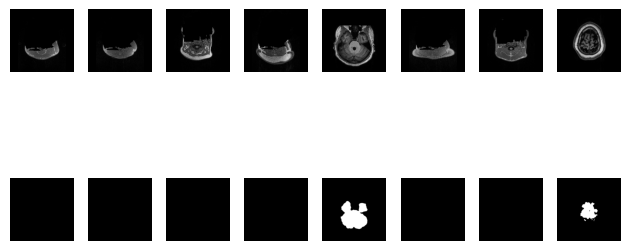

In [21]:
visualize_retrieval(model.retrieval)

In [10]:
model.retrieval['image'][0].shape

torch.Size([3, 256, 256])